# Convolutional Neural Network
CNN with CIFAR-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import warnings 
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Install the package 'visualkeras'
     ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
     ---------------------------------------- 43.2/43.2 kB 2.2 MB/s eta 0:00:00
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [2]:
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

170498071/170498071 [==============================] - 25s 0us/step
X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

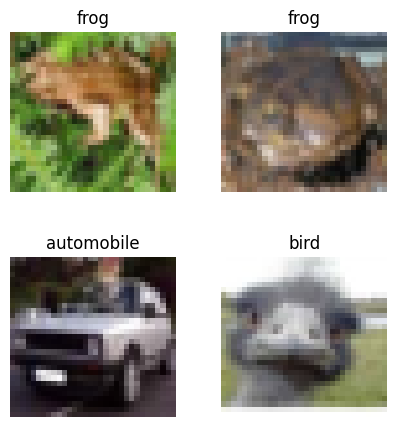

In [4]:
def plot_images(X, y=None, n_cols=2, n_rows=2):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(n_cols, n_rows, figsize = (5,5))
    axes = axes.ravel() 
    n_train = len(X) 

    for i in np.arange(0, n_cols * n_rows):
        index = np.random.randint(0, n_train)
        axes[i].imshow(X[index,1:])
        label_index = int(y[index])
        axes[i].set_title(labels[label_index], fontsize = 12)
        axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)

plot_images(X_train, y_train)

Text(0.5, 1.0, 'Class distribution in training set')

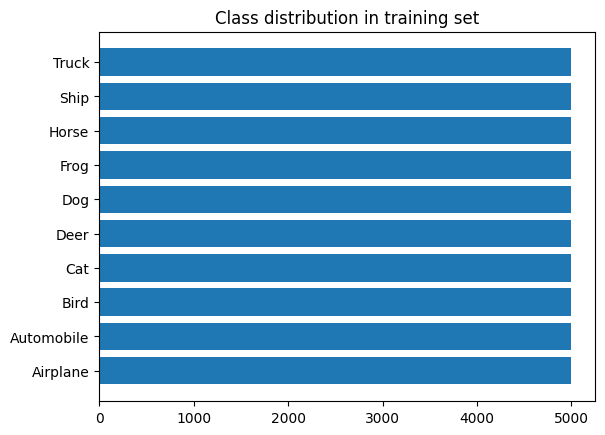

In [5]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

In [6]:
# Scale the data
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Transform target variable into one-hotencoding
y_train_enc = to_categorical(y_train, 10)
y_test_enc = to_categorical(y_test, 10)

In [7]:
print('Before nomalization : ')
print(X_train[0][0])
print('After nomalization : ')
print(X_train_norm[0][0])

Before nomalization : 
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]
After nomalization : 
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56

# Shallow CNN model

In [8]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

#Creating our CNN model
model = keras.Sequential([
  Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding= 'same', input_shape= (32, 32, 3)),
  Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  MaxPool2D(pool_size= (2,2), padding='same'),
  Dropout(0.3),

  Flatten(),

  Dense(256, activation= 'relu'),
  Dropout(0.35),
  Dense(10, activation= 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

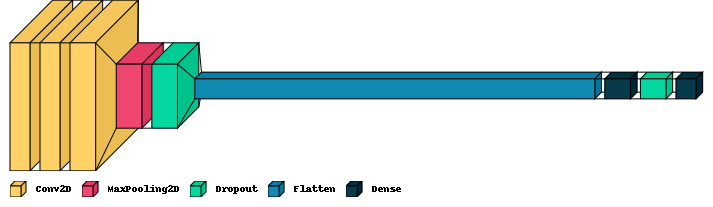

In [9]:
visualkeras.layered_view(model, legend=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 256)       0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                        

In [11]:
history = model.fit(
    X_train_norm, 
    y_train_enc, 
    batch_size= 512,
    epochs= 30, 
    verbose= 1, 
    validation_split=0.3,
    )

Epoch 1/30
69/69 [==============================] - 232s 3s/step - loss: 2.8636 - accuracy: 0.1952 - val_loss: 1.9388 - val_accuracy: 0.3165
Epoch 2/30
18/69 [======>.......................] - ETA: 2:57 - loss: 1.9805 - accuracy: 0.2729

KeyboardInterrupt: 

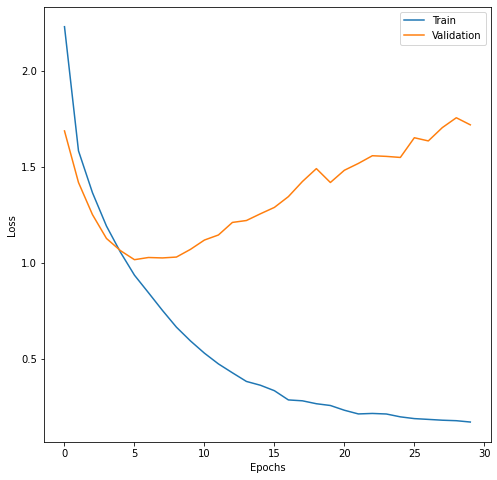

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_loss(history)

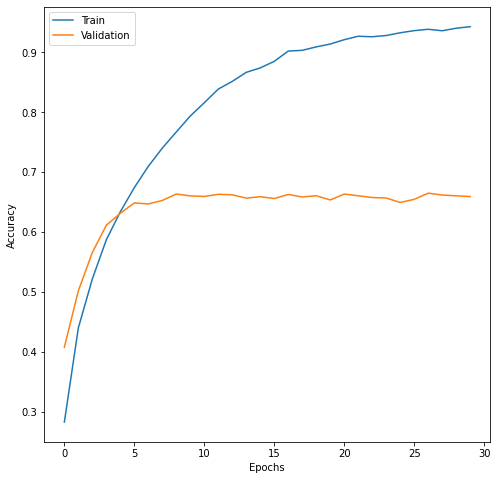

In [ ]:
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.show()    
plot_acc(history)

In [ ]:
evaluation = model.evaluate(X_test_norm, y_test_enc)
print('Test Accuracy of Model: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 7ms/step - loss: 1.7759 - accuracy: 0.6563
Test Accuracy of Model: 0.6563000082969666


In [ ]:
def show_feature_maps(model_trained, img):
  plt.rcParams["figure.figsize"] = (8,8)
  img_expanded = np.expand_dims(img, axis=0) #Make it compatible with input shape

  indexes = [0,1,2] #List of layers for which you want to visualise feature maps
  outputs = [model_trained.layers[i].output for i in indexes]
  model_feature_maps = Model(inputs=model_trained.inputs, outputs=outputs) #Make a model to directly output feature maps

  feature_maps = model_feature_maps.predict(img_expanded)

  square = 4 #Plot 16 feature maps from each of the layers in index
  s = f"""\n  \n""" #Empty space to differentiate layers
  for fmap in feature_maps:
    # plot 16 maps for first 3 layers
      ix = 1
      for _ in range(square):
          for _ in range(square):
              # specify subplot
              ax = plt.subplot(square, square, ix)
              ax.set_xticks([])
              ax.set_yticks([])

              # plot filter channel 
              plt.imshow(fmap[0, :, :, ix-1], cmap='viridis')
              ix += 1

      plt.text(0,64,s)
      plt.show()

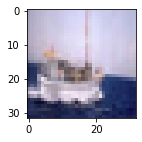

1/1 [==============================] - 0s 62ms/step


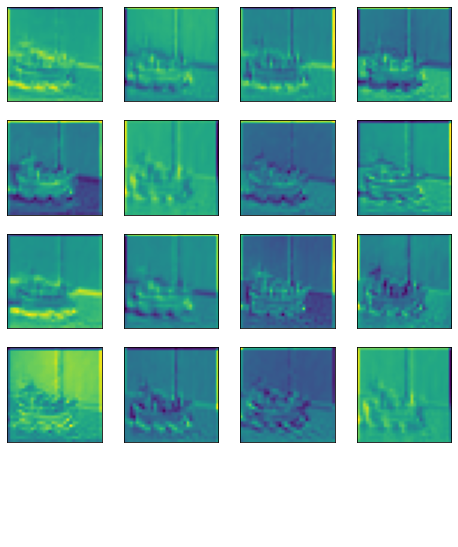

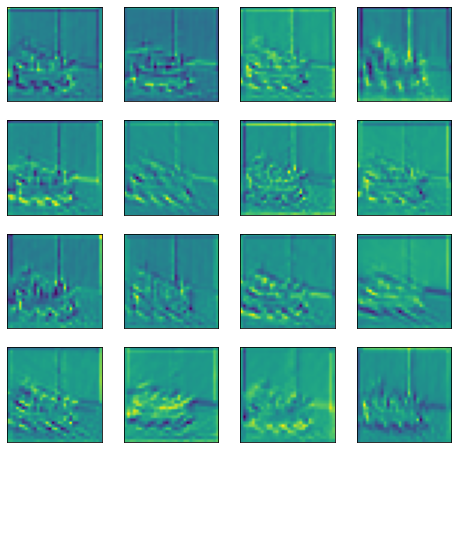

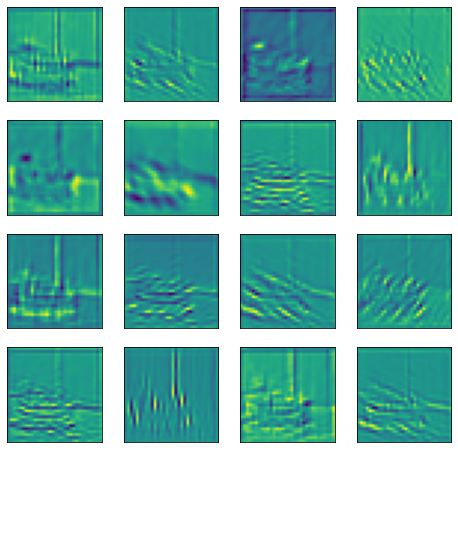

In [ ]:
#Randomly choosing image from test set and plotting it
plt.rcParams["figure.figsize"] = (2,2)
np.random.seed(7) #For Reproducibility
img_index = np.random.choice(range(0, len(X_test)))
img = X_test[img_index]
plt.imshow(img)
plt.show()

show_feature_maps(model, img)

# Deep CNN model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

#Creating our CNN model
model_deep = keras.Sequential([
  Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding= 'same', input_shape= (32, 32, 3)),
  Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  MaxPool2D(pool_size= (2,2), padding='same'),
  Dropout(0.3),

  Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding= 'same'),
  MaxPool2D(pool_size= (2,2), padding='valid'),
  Dropout(0.2),

  Flatten(),

  Dense(256, activation= 'relu'),
  Dropout(0.35),
  Dense(128, activation= 'relu'),
  Dense(10, activation= 'softmax')
])

model_deep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

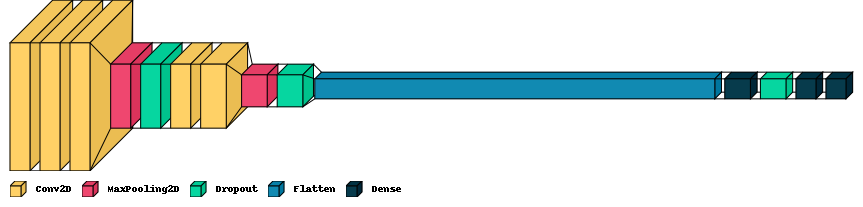

In [ ]:
visualkeras.layered_view(model_deep, legend=True)

In [ ]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       147584    
                                                      

In [ ]:
history_deep = model_deep.fit(
    X_train_norm, 
    y_train_enc, 
    batch_size= 512,
    epochs= 30, 
    verbose= 1, 
    validation_split=0.3,
    )

Epoch 1/30
69/69 [==============================] - 21s 228ms/step - loss: 1.9235 - accuracy: 0.3009 - val_loss: 1.5916 - val_accuracy: 0.4331
Epoch 2/30
69/69 [==============================] - 14s 206ms/step - loss: 1.4321 - accuracy: 0.4856 - val_loss: 1.2674 - val_accuracy: 0.5476
Epoch 3/30
69/69 [==============================] - 13s 187ms/step - loss: 1.1297 - accuracy: 0.5984 - val_loss: 1.0376 - val_accuracy: 0.6428
Epoch 4/30
69/69 [==============================] - 14s 204ms/step - loss: 0.9574 - accuracy: 0.6645 - val_loss: 0.9301 - val_accuracy: 0.6739
Epoch 5/30
69/69 [==============================] - 13s 188ms/step - loss: 0.8497 - accuracy: 0.7029 - val_loss: 0.9774 - val_accuracy: 0.6715
Epoch 6/30
69/69 [==============================] - 13s 190ms/step - loss: 0.7609 - accuracy: 0.7332 - val_loss: 0.9405 - val_accuracy: 0.6877
Epoch 7/30
69/69 [==============================] - 14s 206ms/step - loss: 0.6757 - accuracy: 0.7671 - val_loss: 0.8663 - val_accuracy: 0.7141

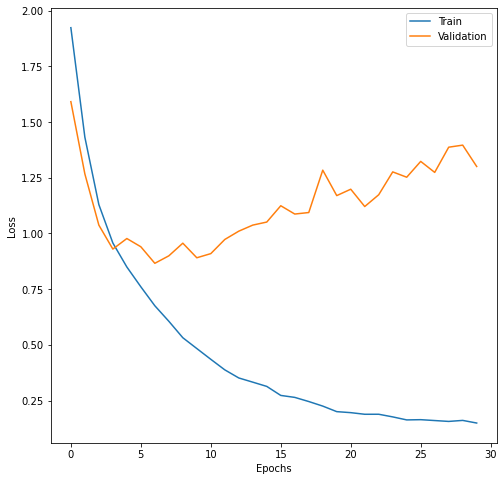

In [ ]:
plot_loss(history_deep)

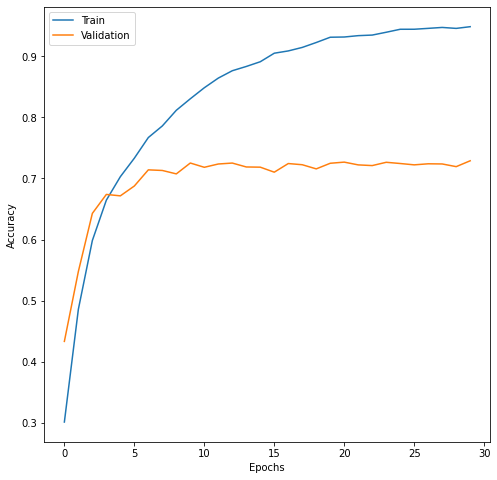

In [ ]:
plot_acc(history_deep)

In [ ]:
evaluation_deep = model_deep.evaluate(X_test_norm, y_test_enc)
print('Test Accuracy of Model: {}'.format(evaluation_deep))

313/313 [==============================] - 2s 7ms/step - loss: 1.3017 - accuracy: 0.7210
Test Accuracy of Model: [1.301686406135559, 0.7210000157356262]


In [ ]:
def show_feature_maps(model_trained, img):
  plt.rcParams["figure.figsize"] = (8,8)
  img_expanded = np.expand_dims(img, axis=0) #Make it compatible with input shape

  indexes = [0,1,2] #List of layers for which you want to visualise feature maps
  outputs = [model_trained.layers[i].output for i in indexes]
  model_feature_maps = Model(inputs=model_trained.inputs, outputs=outputs) #Make a model to directly output feature maps

  feature_maps = model_feature_maps.predict(img_expanded)

  square = 4 #Plot 16 feature maps from each of the layers in index
  s = f"""\n  \n""" #Empty space to differentiate layers
  for fmap in feature_maps:
    # plot 16 maps for first 3 layers
      ix = 1
      for _ in range(square):
          for _ in range(square):
              # specify subplot
              ax = plt.subplot(square, square, ix)
              ax.set_xticks([])
              ax.set_yticks([])

              # plot filter channel 
              plt.imshow(fmap[0, :, :, ix-1], cmap='viridis')
              ix += 1

      plt.text(0,64,s)
      plt.show()

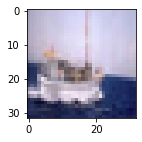

1/1 [==============================] - 0s 59ms/step


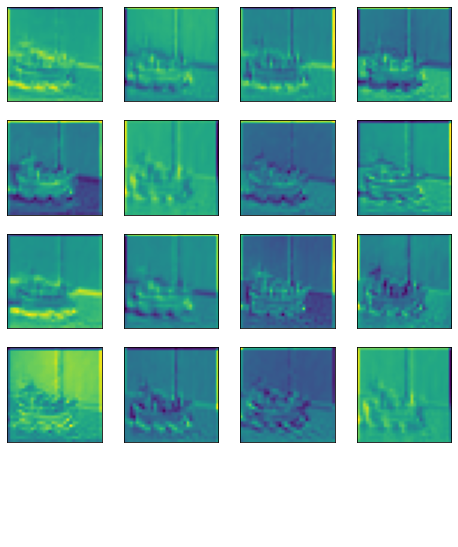

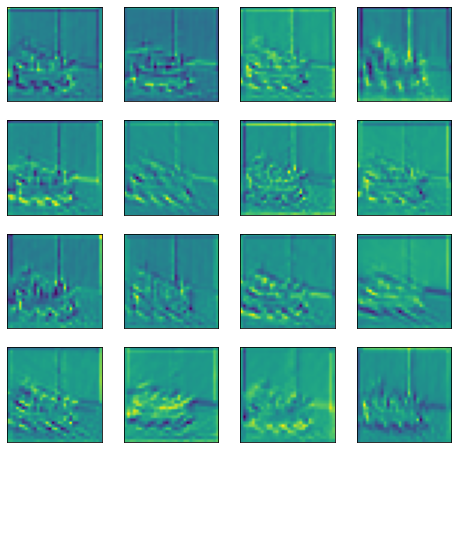

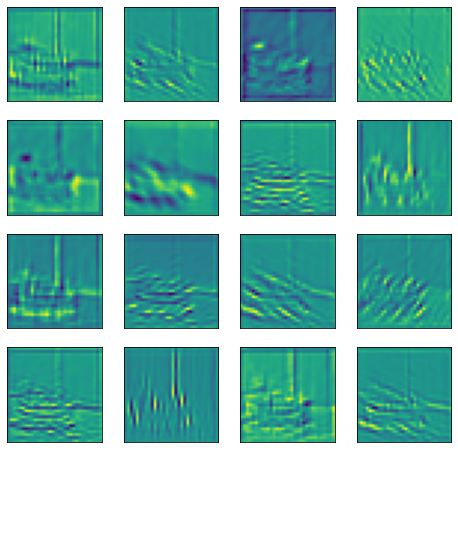

In [ ]:
#Randomly choosing image from test set and plotting it
plt.rcParams["figure.figsize"] = (2,2)
np.random.seed(7) #For Reproducibility
img_index = np.random.choice(range(0, len(X_test)))
img = X_test[img_index]
plt.imshow(img)
plt.show()

show_feature_maps(model, img)